#Part1


Program to implement EM algorithm, with a Gaussian mixture model on the Iris dataset for k=3.

In [ ]:
from sklearn.datasets import load_iris
from scipy.stats import multivariate_normal
import numpy as np
data = load_iris()
X = np.array(data.data)
Y = data.target
X.shape

(150, 4)

In [ ]:
# Reference: http://www.oranlooney.com/post/ml-from-scratch-part-5-gmm/
# initialize
def initialize(X, k):
    phi=[]
    weights=[]
    mu=[]
    sigma=[]
    n,m = X.shape
    phi = np.full(shape=k, fill_value=1/k)
    weights = np.full( shape=X.shape, fill_value=1/k)

    random_row = np.random.randint(low=0, high=n, size=k)
    mu = [  X[row_index,:] for row_index in random_row ]
    sigma = [ np.cov(X.T) for _ in range(k) ]
    return (phi, weights, mu, sigma)

In [ ]:
def predict_probability(X, k):
    n,m = X.shape
    likelihood = np.zeros( (n, k) )
    for i in range(k):
        distribution = multivariate_normal(
            mean=mu[i], 
            cov=sigma[i])
        likelihood[:,i] = distribution.pdf(X)

    numerator = likelihood * phi
    denominator = numerator.sum(axis=1)[:, np.newaxis]
    weights = numerator / denominator
    return weights

In [ ]:
def e_step(X,k):
    weights = predict_probability(X, k)
    phi = weights.mean(axis=0)
    return weights,phi

In [ ]:
def m_step(X,k):
    for i in range(k):
        weight = weights[:, [i]]
        total_weight = weight.sum()
        mu[i] = (X * weight).sum(axis=0) / total_weight
        sigma[i] = np.cov(X.T, 
            aweights=(weight/total_weight).flatten(), 
            bias=True)
    return (phi, weights, mu, sigma)

In [ ]:
def get_prediction(X, k):
    weights = predict_probability(X,k)
    return np.argmax(weights, axis=1)

In [ ]:
# run for k=3
k=3
phi, weights, mu, sigma = initialize(X, k)
for i in range(10):
    weights, phi = e_step(X,k)
    phi, weights, mu, sigma = m_step(X,k)
prediction = get_prediction(X, k)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1])

In [ ]:
accuracy = np.mean(Y == prediction)
# accuracy for k=3
accuracy

0.84

# Part 2


Plot for Sepal length and width points with a color coding based on the obtained clusters. 
RGB colour values correspond to the probability estimates of a data point belonging to each class.

In [ ]:
import matplotlib.pyplot as plt
def plot(k, prediction):
    plt.title('Clusters')
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    plt.scatter(
        X[:, 0], 
        X[:, 1], 
        c=prediction, 
        cmap=plt.cm.get_cmap('brg'),
        marker='x')
    plt.show()

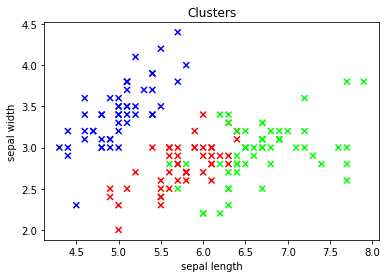

In [ ]:
# k=3
plot(k, prediction)

# Part 3

Prediction accuracy with different numbers of assumed classes for k=2, 3, and 4

In [ ]:
# run for k=2
k=2
phi, weights, mu, sigma = initialize(X, k)
for i in range(5):
    weights, phi = e_step(X,k)
    phi, weights, mu, sigma = m_step(X,k)
prediction = get_prediction(X, k)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy = np.mean(Y == prediction)
# accuracy for k=2
accuracy

0.4

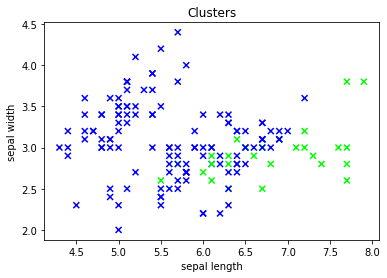

In [ ]:
# k=2
plot(k, prediction)

In [ ]:
# run for k=4
k=4
phi, weights, mu, sigma = initialize(X, k)
for i in range(5):
    weights, phi = e_step(X,k)
    phi, weights, mu, sigma = m_step(X,k)
prediction = get_prediction(X, k)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 1, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3,
       2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
accuracy = np.mean(Y == prediction)
# accuracy for k=4
accuracy

0.5266666666666666

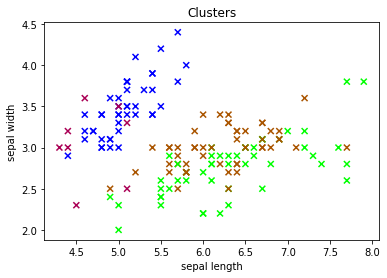

In [ ]:
# k=4
plot(k, prediction)

From above observation, we can say that our model performs best with k=3 with accuracy as 84%, with k=2 accuracy is 40%, with k=4 accuracy is 52%.

